<a href="https://colab.research.google.com/github/alice410451027/testrepo/blob/Statistical-Analysis/Dark_Tetrad_Scale_EFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goal: EFA for Dark Tetrad Scale

In [20]:
import pandas as pd
df = pd.read_excel("/content/DarkTetrad_data1.xlsx")
df

,School,Grade,Birth,Sex,X1,X2,X3,X4,X5,X6,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28
0,HSJH,8,99.05,1,6,1,3,5,4,2,...,1,1,1,1,1,1,1,1,1,6
1,HSJH,8,99.02,1,4,3,3,4,3,3,...,2,5,3,1,1,1,1,3,1,2
2,HSJH,8,99.01,0,4,6,5,6,5,4,...,6,6,4,1,6,1,6,1,6,6
3,HSJH,8,98.09,0,4,6,4,4,4,4,...,4,3,4,3,3,3,3,3,1,1
4,HSJH,8,98.09,1,6,4,6,4,6,4,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,DSJH,7,100.07,1,5,5,5,5,5,2,...,5,5,4,6,3,4,2,1,1,6
293,DSJH,9,98.03,0,3,2,4,6,5,3,...,3,3,5,2,3,3,3,2,2,4
294,DSJH,9,97.11,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
295,DSJH,9,97.10,1,6,3,3,4,3,3,...,4,4,2,1,1,1,1,1,1,5


In [21]:
#Selectcolumns27to45(Python uses 0-based indexing,so these are columns 26 to 44)
selected_columns=df.iloc[:,4:32]
selected_columns

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28
0,6,1,3,5,4,2,1,1,1,4,...,1,1,1,1,1,1,1,1,1,6
1,4,3,3,4,3,3,3,3,3,3,...,2,5,3,1,1,1,1,3,1,2
2,4,6,5,6,5,4,1,1,4,1,...,6,6,4,1,6,1,6,1,6,6
3,4,6,4,4,4,4,3,3,3,3,...,4,3,4,3,3,3,3,3,1,1
4,6,4,6,4,6,4,5,1,1,3,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,5,5,5,5,5,2,4,2,4,4,...,5,5,4,6,3,4,2,1,1,6
293,3,2,4,6,5,3,6,3,3,3,...,3,3,5,2,3,3,3,2,2,4
294,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
295,6,3,3,4,3,3,4,4,5,4,...,4,4,2,1,1,1,1,1,1,5


In [22]:
#Check NA
print(selected_columns.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
dtype: int64


#1.Descriptive Analysis

In [23]:
# Skew & Kurtosis
from scipy.stats import skew, kurtosis
# Descriptive statistics
descriptive_stats = selected_columns.describe()
# Add Skew and Kurtosis
descriptive_stats.loc['skew'] = selected_columns.apply(skew)
descriptive_stats.loc['kurtosis'] = selected_columns.apply(kurtosis)
print(descriptive_stats)

                  X1          X2          X3          X4          X5  \
count     297.000000  297.000000  297.000000  297.000000  297.000000   
mean        4.215488    3.723906    4.333333    4.299663    4.525253   
std         1.535843    1.437152    1.310044    1.333470    1.286705   
min         1.000000    1.000000    1.000000    1.000000    1.000000   
25%         3.000000    3.000000    4.000000    4.000000    4.000000   
50%         4.000000    4.000000    4.000000    4.000000    5.000000   
75%         6.000000    5.000000    5.000000    5.000000    6.000000   
max         6.000000    6.000000    6.000000    6.000000    6.000000   
skew       -0.538367   -0.220456   -0.577981   -0.611075   -0.723201   
kurtosis   -0.649805   -0.620017   -0.221015   -0.002120    0.203830   

                  X6          X7          X8          X9         X10  ...  \
count     297.000000  297.000000  297.000000  297.000000  297.000000  ...   
mean        3.158249    3.313131    2.572391    3.084

#2.KMO & Bartlett's Test

In [24]:
%pip install factor_analyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import bartlett

#KMO
kmo_all, kmo_model = calculate_kmo(selected_columns)
print(f"Overall KMO: {kmo_model:.3f}")
print("KMO for each item:\n", kmo_all)
print("\n")

#Bartlett's test
bartlett_test=bartlett(*[selected_columns.iloc[:,i]for i in
range(selected_columns.shape[1])])
print("Bartlett'steststatistic:",bartlett_test.statistic)
print("Bartlett'stestp-value:",bartlett_test.pvalue)

Overall KMO: 0.853
KMO for each item:
 [0.79316178 0.86868646 0.77101733 0.76361617 0.76592533 0.84211621
 0.88672362 0.82616717 0.85274888 0.85368067 0.83365646 0.7632746
 0.80808572 0.90402356 0.88673539 0.85120471 0.88806743 0.8438457
 0.84745704 0.85869407 0.89955617 0.86778584 0.86347565 0.90948544
 0.86914801 0.89854384 0.80643647 0.88842665]


Bartlett'steststatistic: 251.99740381156408
Bartlett'stestp-value: 2.217497370015055e-38


Based on the results, KMO was .85, which means a very good level of suitability for factor analysis.
Moreover, Bartlett's test was 251.99, p < .001, supporting the appropriateness of factor analysis.
Overall, both the KMO measure and Bartlett's test indicate that the dataset is well-suited for factor analysis.

#3.Parallel Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
def parallel_analysis(data, K=10, print_eigenvalues=False, random_state=None):
  if random_state is not None:
    np.random.seed(random_state)
  n, m = data.shape
  fa = FactorAnalyzer(n_factors=1, method='ml', rotation=None, use_smc=True)
  sum_component_eigens = np.zeros(m)
  sum_factor_eigens = np.zeros(m)

  for _ in range(K):
    fa.fit(np.random.normal(size=(n, m)))
    sum_component_eigens += fa.get_eigenvalues()[0]
    sum_factor_eigens += fa.get_eigenvalues()[1]
  avg_component_eigens = sum_component_eigens / K
  avg_factor_eigens = sum_factor_eigens / K
  fa.fit(data)
  data_eigenvalues = fa.get_eigenvalues()
  if print_eigenvalues:
    print('Principal component eigenvalues for random matrix:\n', avg_component_eigens)
    print('Factor eigenvalues for random matrix:\n', avg_factor_eigens)
    print('Principal component eigenvalues for data:\n', data_eigenvalues[0])
    print('Factor eigenvalues for data:\n', data_eigenvalues[1])

  plt.figure(figsize=(8, 6))
  plt.plot([0, m+1], [1, 1], 'k--', alpha=0.3)

  plt.plot(range(1, m+1), avg_component_eigens, 'b', label='PC - random', alpha=0.4)
  plt.scatter(range(1, m+1), data_eigenvalues[0], c='b', marker='o')
  plt.plot(range(1, m+1), data_eigenvalues[0], 'b', label='PC - data')

  plt.plot(range(1, m+1), avg_factor_eigens, 'r', label='FA - random', alpha=0.4)
  plt.scatter(range(1, m+1), data_eigenvalues[1], c='r', marker='o')
  plt.plot(range(1, m+1), data_eigenvalues[1], 'r', label='FA - data')

  plt.title('Parallel Analysis Scree Plots', {'fontsize': 20})
  plt.xlabel('Factors/Components', {'fontsize': 15})
  plt.xticks(ticks=range(1, m+1), labels=range(1, m+1))
  plt.ylabel('Eigenvalue', {'fontsize': 15})
  plt.legend()
  plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

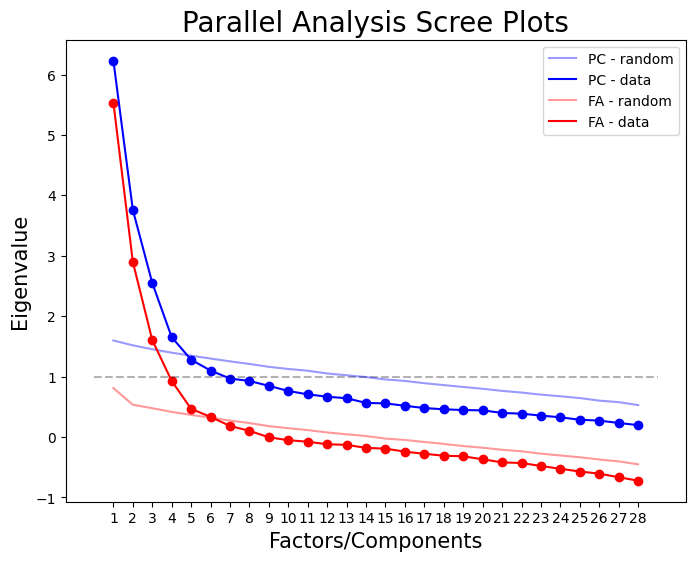

In [26]:
parallel_analysis(selected_columns)

* The blue line (PC - data) represents the real data’s eigenvalues
for Principal Component Analysis (PCA).
* The red line (FA - data) represents the real data’s eigenvalues for Factor Analysis (FA).
* The parallel analysis suggests that 6 factors should be retained for the factor analysis model.
* However, based on the theory, these items were devided into four factors.

#4.Exploratory Factor Analysis, EFA

##4-1.No Rotaiton

In [27]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np

efa=FactorAnalyzer(n_factors=4,method="ml",rotation=None)

efa.fit(selected_columns)
loadings=efa.loadings_

columns=['F1','F2','F3','F4']
index=selected_columns.columns
output_df=pd.DataFrame(loadings,columns=columns,index=index)

communalities=efa.get_communalities()
uniquenesses=efa.get_uniquenesses()
output_df['Communality']=communalities
output_df['Uniqueness']=uniquenesses

output_df[['F1','F2','F3','F4']]=output_df[['F1','F2','F3','F4']].applymap(
    lambda x: '' if abs(x) < 0.3 else x
)
print(output_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


           F1        F2        F3        F4  Communality  Uniqueness
X1                        0.40173               0.261853    0.738147
X2   0.302591  0.345514  0.374986               0.356164    0.643836
X3              0.33479  0.503169               0.367872    0.632128
X4                       0.575242               0.403615    0.596385
X5             0.334304  0.652607               0.538608    0.461392
X6   0.441642                                   0.264037    0.735963
X7   0.532453                                   0.338165    0.661835
X8             0.620574                         0.516710    0.483290
X9             0.701681                         0.601719    0.398281
X10             0.60165                         0.457546    0.542454
X11            0.629136                         0.517370    0.482630
X12             0.67236                         0.518846    0.481154
X13            0.585087                         0.451352    0.548648
X14  0.511643                     

<ipython-input-27-6c46fca116b0>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  output_df[['F1','F2','F3','F4']]=output_df[['F1','F2','F3','F4']].applymap(


#4-1.Variance Explained

In [28]:
total_variance=efa.get_factor_variance()
pd.DataFrame(total_variance,columns=['F1','F2','F3','F4'],index=['SSLoadings',
'Proportional Variance', 'Cumulative Variance'])

,F1,F2,F3,F4
SSLoadings,5.534221,3.351362,1.982512,1.167852
Proportional Variance,0.197651,0.119692,0.070804,0.041709
Cumulative Variance,0.197651,0.317342,0.388146,0.429855


This table summarizes the results of a factor analysis. SS Loadings represent the total variance explained by each factor. Proportional Variance shows how much variance each factor explains individually, while Cumulative Variance indicates the total variance explained when factors are combined. For example, Factor 1(F1)explains 19.77% of the variance, and the first two factors together explain 31.73%.

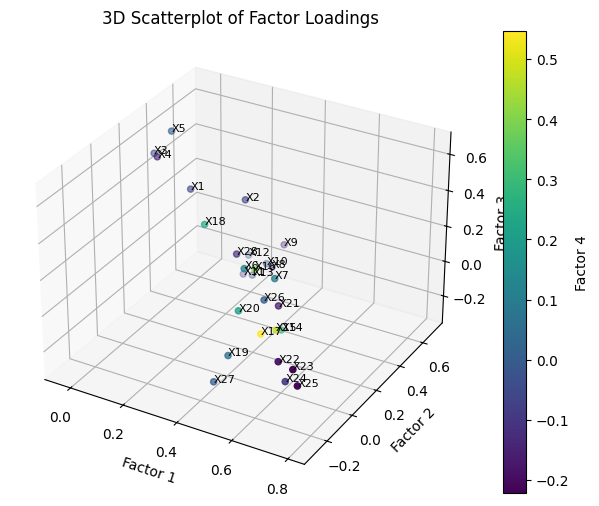

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

factor_loadings = efa.loadings_

sc = ax.scatter(factor_loadings[:, 0], factor_loadings[:, 1], factor_loadings[:, 2],
                c=factor_loadings[:, 3], cmap='viridis', marker='o')

for i, label in enumerate(selected_columns.columns):
    ax.text(factor_loadings[i, 0], factor_loadings[i, 1], factor_loadings[i, 2], label, size=8)

ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.set_zlabel('Factor 3')
plt.colorbar(sc, label="Factor 4")
plt.title("3D Scatterplot of Factor Loadings")
plt.show()

#4-2.Promax Rotation

In [30]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np

efa_va=FactorAnalyzer(n_factors=4,method="ml",rotation="promax")
efa_va.fit(selected_columns)

loadings_va=efa_va.loadings_
columns=['F1','F2','F3','F4']
index=selected_columns.columns

output_df_va=pd.DataFrame(loadings_va,columns=columns,index=index)

communalities_va=efa_va.get_communalities()
uniquenesses_va=efa_va.get_uniquenesses()

output_df_va['Communality']=communalities_va
output_df_va['Uniqueness']=uniquenesses_va

output_df_va[['F1','F2','F3','F4']]=output_df_va[['F1','F2','F3','F4']].applymap(
lambda x:''if abs(x)<0.3 else x
)
print(output_df_va)

           F1        F2        F3        F4  Communality  Uniqueness
X1                                 0.497174     0.251802    0.748198
X2                                 0.488673     0.277494    0.722506
X3                                 0.606155     0.396726    0.603274
X4                                 0.667629     0.477516    0.522484
X5                                 0.747356     0.587566    0.412434
X6                                              0.171802    0.828198
X7                                              0.194554    0.805446
X8             0.714963                         0.520614    0.479386
X9             0.738823                         0.566226    0.433774
X10            0.653172                         0.438375    0.561625
X11            0.758825                         0.588916    0.411084
X12            0.728194                         0.559812    0.440188
X13            0.688986                         0.478657    0.521343
X14                      0.502209 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-30-8d0684b567d4>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  output_df_va[['F1','F2','F3','F4']]=output_df_va[['F1','F2','F3','F4']].applymap(


The initial EFA results indicate that some items exhibit cross-loadings (e.g., X6, 7, 14, 18, 19, 20, 21, 27, 28). Therefore, after carefully reviewing and refining the factor loadings, the final retained items are listed below:

#Variance Explained

In [31]:
total_variance_va=efa_va.get_factor_variance()
pd.DataFrame(total_variance_va,columns=['F1','F2','F3','F4'],index= ['SS Loadings', 'Proportional Variance', 'Cumulative Variance'])

,F1,F2,F3,F4
SS Loadings,4.237570,3.278889,2.517509,2.411773
Proportional Variance,0.151342,0.117103,0.089911,0.086135
Cumulative Variance,0.151342,0.268445,0.358356,0.444491


#4-3.Eliminate the crossloading items & Promax Rotaiton

In [47]:
from factor_analyzer.factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np

excluded_items = ["X6", "X7", "X14","X18", "X19", "X20","X21", "X27","X28"]
selected_columns_filtered = selected_columns.drop(columns=excluded_items)

efa_va = FactorAnalyzer(n_factors=4, method="ml", rotation="promax")
efa_va.fit(selected_columns_filtered)

loadings_va = efa_va.loadings_
columns = ['Machiavellianism', 'Psychopathy', 'Narcissism', 'Sadism']
index = selected_columns_filtered.columns

output_df_va = pd.DataFrame(loadings_va, columns=columns, index=index)

communalities_va = efa_va.get_communalities()
uniquenesses_va = efa_va.get_uniquenesses()

output_df_va['Communality'] = communalities_va
output_df_va['Uniqueness'] = uniquenesses_va

output_df_va[['Machiavellianism', 'Psychopathy', 'Narcissism', 'Sadism']] = output_df_va[['Machiavellianism', 'Psychopathy', 'Narcissism', 'Sadism']].map(
    lambda x: '' if abs(x) < 0.3 else x
)

print(output_df_va)


    Machiavellianism Psychopathy Narcissism    Sadism  Communality  Uniqueness
X1                                 0.459505               0.215569    0.784431
X2                                 0.447245               0.245731    0.754269
X3                                 0.601567               0.382487    0.617513
X4                                   0.7041               0.528957    0.471043
X5                                 0.789574               0.655066    0.344934
X8          0.728826                                      0.543252    0.456748
X9          0.756017                                      0.582244    0.417756
X10         0.649649                                      0.434686    0.565314
X11         0.759504                                      0.592626    0.407374
X12         0.717958                                      0.530495    0.469505
X13         0.678736                                      0.462142    0.537858
X15                                          0.71971

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [48]:
total_variance_va=efa_va.get_factor_variance()
pd.DataFrame(total_variance_va,columns=['F1','F2','F3','F4'],index= ['SS Loadings', 'Proportional Variance', 'Cumulative Variance'])

,F1,F2,F3,F4
SS Loadings,3.154846,2.971606,1.971266,1.581800
Proportional Variance,0.166045,0.156400,0.103751,0.083253
Cumulative Variance,0.166045,0.322445,0.426196,0.509448


After the elimination, the cumulative variance increased.
The total cumulative variance is 50.94%.

In [34]:
selected_columns_filtered

,X1,X2,X3,X4,X5,X8,X9,X10,X11,X12,X13,X15,X16,X17,X22,X23,X24,X25,X26
0,6,1,3,5,4,1,1,4,3,3,3,3,4,3,1,1,1,1,1
1,4,3,3,4,3,3,3,3,3,4,4,2,2,2,1,1,1,1,3
2,4,6,5,6,5,1,4,1,1,2,3,6,1,6,1,6,1,6,1
3,4,6,4,4,4,3,3,3,3,3,3,4,4,4,3,3,3,3,3
4,6,4,6,4,6,1,1,3,3,3,1,1,6,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,5,5,5,5,5,2,4,4,3,5,5,2,3,5,6,3,4,2,1
293,3,2,4,6,5,3,3,3,2,4,4,2,2,3,2,3,3,3,2
294,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
295,6,3,3,4,3,4,5,4,5,5,4,4,4,2,1,1,1,1,1


#Cronbach's alpha

In [44]:
from sklearn.metrics import matthews_corrcoef

def cronbach_alpha(items):
    items = items.dropna()
    n_items = items.shape[1]
    variances = items.var(axis=0, ddof=1)
    total_variance = items.sum(axis=1).var(ddof=1)
    return (n_items / (n_items - 1)) * (1 - (variances.sum() / total_variance))

Machiavellianism = cronbach_alpha(selected_columns_filtered.iloc[:, 0:4])
Psychopathy = cronbach_alpha(selected_columns_filtered.iloc[:, 5:10])
Narcissism = cronbach_alpha(selected_columns_filtered.iloc[:, 11:13])
Sadism = cronbach_alpha(selected_columns_filtered.iloc[:, 14:18])
from sklearn.metrics import matthews_corrcoef

def cronbach_alpha(items):
    items = items.dropna()
    n_items = items.shape[1]
    variances = items.var(axis=0, ddof=1)
    total_variance = items.sum(axis=1).var(ddof=1)
    return (n_items / (n_items - 1)) * (1 - (variances.sum() / total_variance))

Machiavellianism = cronbach_alpha(selected_columns_filtered.iloc[:, 0:4])
Psychopathy = cronbach_alpha(selected_columns_filtered.iloc[:, 5:10])
Narcissism = cronbach_alpha(selected_columns_filtered.iloc[:, 11:13])
Sadism = cronbach_alpha(selected_columns_filtered.iloc[:, 14:18])
Total = cronbach_alpha(selected_columns_filtered)
print("Cronbach's Alpha for each factor:")
print(f"Machiavellianism: {Machiavellianism:.3f}")
print(f"Psychopathy: {Psychopathy:.3f}")
print(f"Narcissism: {Narcissism:.3f}")
print(f"Sadism: {Sadism:.3f}")
print(f"Total: {Total:.3f}")

Cronbach's Alpha for each factor:
Machiavellianism: 0.650
Psychopathy: 0.837
Narcissism: 0.590
Sadism: 0.880
Total: 0.803


The final retained items and their corresponding Cronbach’s Alpha values for each factor are as follows:

Machiavellianism: 0.650
Psychopathy: 0.837
Narcissism: 0.590
Sadism: 0.880
Overall: 0.803
Hence, the final retained items demonstrate acceptable to strong internal consistency across most factors, with the overall Cronbach’s Alpha reaching 0.803.